# Objective is to predict the daily count of bike rentals 

In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

# reading data

In [3]:
df = pd.read_csv('F:/EdwisorProject1/day.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Converting dteday to datetime

In [6]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [7]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

extracting date from dteday to check if cnt(bike rental count) has any relationship with day(date)

In [8]:
df['day'] = df['dteday'].dt.day

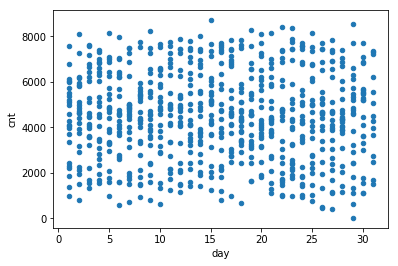

In [9]:
df.plot.scatter('day','cnt')

Day has no relationship with cnt

Dropping instant, dteday(mnth and yr are present), day, casual & registered (only cnt is taken as dependent variable) variables

In [10]:
df = df.drop(['instant','dteday','day','casual','registered'],axis=1)

In [11]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


There are 12 variables in dataframe df out of which cnt is dependent variable.
All other variables are independent variables.
This is a regression problem.

In [12]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


# Exploratory Data Analysis

Variables - season,yr,mnth,holiday,weekday,workingday,weathersit - are categorical so no distribution visualization

# Visualizing variable temp distribution

(array([  7.,  36.,  90., 104.,  93.,  80.,  93., 101., 103.,  24.]),
 array([0.0591304 , 0.13938406, 0.21963772, 0.29989138, 0.38014504,
        0.4603987 , 0.54065236, 0.62090602, 0.70115968, 0.78141334,
        0.861667  ]),
 <a list of 10 Patch objects>)

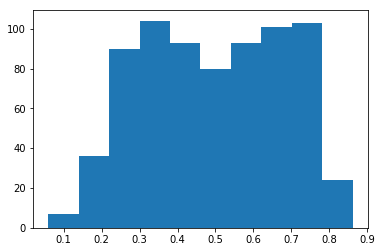

In [13]:
plt.hist(df.temp)

(array([ 11.,  34.,  97.,  99.,  98.,  93., 122., 112.,  57.,   8.]),
 array([0.0790696 , 0.15525224, 0.23143488, 0.30761752, 0.38380016,
        0.4599828 , 0.53616544, 0.61234808, 0.68853072, 0.76471336,
        0.840896  ]),
 <a list of 10 Patch objects>)

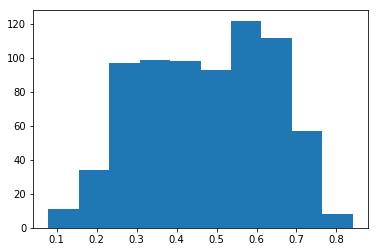

In [14]:
plt.hist(df.atemp)

(array([  1.,   1.,   3.,  18.,  95., 173., 164., 169.,  73.,  34.]),
 array([0.     , 0.09725, 0.1945 , 0.29175, 0.389  , 0.48625, 0.5835 ,
        0.68075, 0.778  , 0.87525, 0.9725 ]),
 <a list of 10 Patch objects>)

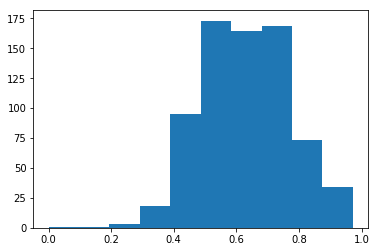

In [15]:
plt.hist(df.hum)

(array([ 26.,  99., 191., 173., 124.,  62.,  35.,  14.,   6.,   1.]),
 array([0.0223917 , 0.07089883, 0.11940596, 0.16791309, 0.21642022,
        0.26492735, 0.31343448, 0.36194161, 0.41044874, 0.45895587,
        0.507463  ]),
 <a list of 10 Patch objects>)

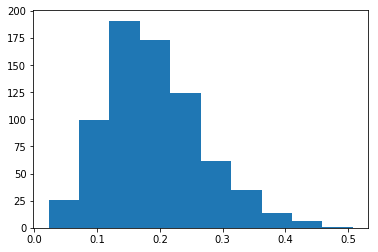

In [16]:
plt.hist(df.windspeed)

(array([ 13.,  62.,  71.,  73., 122., 137.,  81.,  76.,  79.,  17.]),
 array([  22. ,  891.2, 1760.4, 2629.6, 3498.8, 4368. , 5237.2, 6106.4,
        6975.6, 7844.8, 8714. ]),
 <a list of 10 Patch objects>)

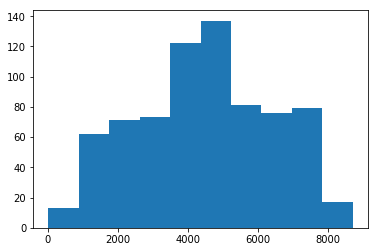

In [17]:
plt.hist(df.cnt)

Variables hum & cnt are close to normal. All other continuous variables are skewed.

# Outliers Analysis

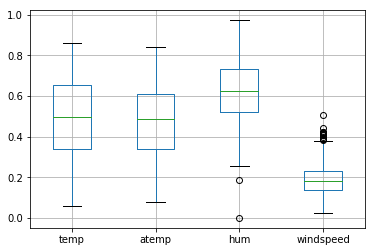

In [18]:
df.boxplot(column=['temp','atemp','hum','windspeed'])

Variables hum & windspeed have outliers. These outliers will be replaced with NaNs.

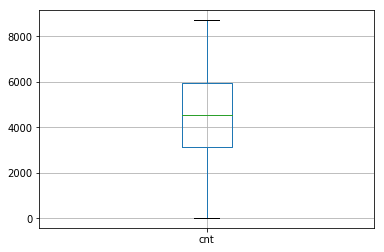

In [19]:
df.boxplot(column=['cnt'])

cnt has no outliers.

In [20]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [21]:
for i in ['hum','windspeed']:
    q75,q25 = np.percentile(df.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25-1.5*iqr
    max = q75+1.5*iqr
    df.loc[df[i] < min,i] = np.nan
    df.loc[df[i] > max,i] = np.nan

In [22]:
df.isnull().sum()

season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
cnt            0
dtype: int64

Outliers in hum & windspeed have been replaced with NaNs.

# Missing Values Analysis

In [23]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


Finding out best method for missing values replacement by checking for mean substitution,median substitution and KNN imputation.Taking 0 index row & putting value for windspeed column equal to np.nan

Making a copy of df for checking mean substitution

In [24]:
df1 = df.copy()

In [25]:
df1.loc[0,'windspeed'] = np.nan

In [26]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,NaN,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [27]:
df1.loc[df1['windspeed'].isnull(),'windspeed'] = df1['windspeed'].mean()

In [28]:
df1.loc[0,'windspeed']

0.1864279912133891

Mean substitution gives value of 0.1864 against original value of 0.1604

Making a copy of df for checking median substitution

In [29]:
df2 = df.copy()

In [30]:
df2.loc[0,'windspeed'] = np.nan

In [31]:
df2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,NaN,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [32]:
df2.loc[df2['windspeed'].isnull(),'windspeed'] = df2['windspeed'].median()

In [33]:
df2.loc[0,'windspeed']

0.179108

Median substitution gives value of 0.1791 against original value of 0.1604

Making a copy of df for checking KNN imputation

In [34]:
df3 = df.copy()

In [35]:
df3.loc[0,'windspeed'] = np.nan

In [36]:
df3.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,NaN,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [37]:
from fancyimpute import KNN

Using TensorFlow backend.


In [38]:
df3 = pd.DataFrame(KNN(k=3).complete(df3),columns=df3.columns)

Imputing row 1/731 with 1 missing, elapsed time: 0.465
Imputing row 101/731 with 0 missing, elapsed time: 0.477
Imputing row 201/731 with 0 missing, elapsed time: 0.478
Imputing row 301/731 with 0 missing, elapsed time: 0.478
Imputing row 401/731 with 0 missing, elapsed time: 0.478
Imputing row 501/731 with 0 missing, elapsed time: 0.479
Imputing row 601/731 with 0 missing, elapsed time: 0.479
Imputing row 701/731 with 0 missing, elapsed time: 0.480


In [39]:
df3.loc[0,'windspeed']

0.1951745713359522

KNN imputation gives value of 0.1951 against original value of 0.1604.So,median substitution has given a value of 0.1791 closest to original value. We will use median substitution for replacing missing values.

Applying median substitution for missing values in variables hum & windspeed in df

In [40]:
for i in ['hum','windspeed']:
    df.loc[df[i].isnull(),i] = df[i].median()

All missing values have been imputed

In [41]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

# Correlation Analysis

Converting season,yr,mnth,holiday,weekday,workingday,weathersit to category dtype

In [42]:
df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [43]:
catcols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

In [44]:
for i in catcols:
    df[i] = df[i].astype('category')

In [45]:
df.dtypes

season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

Doing Chi-square test for correlation between categorical variables

In [46]:
from scipy.stats import chi2_contingency

In [47]:
factors_paired = [(i,j) for i in catcols for j in catcols] 
chi2, p_values =[], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(df[f[0]], df[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)

p1 = np.array(p_values).reshape((7,7))
p1 = pd.DataFrame(p1, index=catcols, columns=catcols)
p1

,season,yr,mnth,holiday,weekday,workingday,weathersit
season,0.000000,0.999929,0.000000,6.831687e-01,1.000000e+00,8.865568e-01,0.021179
yr,0.999929,0.000000,1.000000,9.949247e-01,9.999996e-01,9.799434e-01,0.127379
mnth,0.000000,1.000000,0.000000,5.593083e-01,1.000000e+00,9.933495e-01,0.014637
holiday,0.683169,0.994925,0.559308,0.000000e+00,8.567055e-11,4.033371e-11,0.600857
weekday,1.000000,1.000000,1.000000,8.567055e-11,0.000000e+00,6.775031e-136,0.278459
workingday,0.886557,0.979943,0.993350,4.033371e-11,6.775031e-136,0.000000e+00,0.253764
weathersit,0.021179,0.127379,0.014637,6.008572e-01,2.784593e-01,2.537640e-01,0.000000


workingday vs weekday and holiday vs weekday have p-value < 0.01 so we can drop workingday and holiday but we will keep holiday and drop workingday

In [48]:
df = df.drop(['workingday'],axis=1)

In [49]:
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,0.226957,0.229270,0.436957,0.186900,1600


Correlation between continuous independent variables

In [50]:
contcols = ['temp','atemp','hum','windspeed']

In [51]:
df.loc[:,contcols].corr()

,temp,atemp,hum,windspeed
temp,1.000000,0.991702,0.123723,-0.138937
atemp,0.991702,1.000000,0.137312,-0.164157
hum,0.123723,0.137312,1.000000,-0.200237
windspeed,-0.138937,-0.164157,-0.200237,1.000000


temp and atemp have coeff. of correlation 0.99 so we can drop atemp

In [52]:
df = df.drop(['atemp'],axis=1)

In [53]:
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,0.226957,0.436957,0.186900,1600


# Modelling

Converting categorical variables to dummy variables for modelling

In [53]:
df = pd.get_dummies(df)

In [54]:
df.shape

(731, 34)

In [55]:
df.head()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,985,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0.363478,0.696087,0.248539,801,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1562,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1600,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [56]:
target = df.cnt

In [57]:
df = df.drop(['cnt'],axis=1)

In [58]:
train = np.array(df,order='C',copy=False)
target = np.array(target,order='C',copy=False)

Splitting df into train(80% observations) & test(20% observations)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
trainX, testX, trainY, testY = train_test_split(train,target,test_size=0.20,random_state=45)

In [61]:
trainX.shape

(584, 33)

In [62]:
trainY.shape

(584,)

In [63]:
testX.shape

(147, 33)

In [64]:
testY.shape

(147,)

# LINEAR REGRESSION

In [65]:
import statsmodels.api as sm

In [66]:
model = sm.OLS(trainY,trainX).fit()

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     118.7
Date:                Fri, 10 Aug 2018   Prob (F-statistic):          6.12e-211
Time:                        10:10:42   Log-Likelihood:                -4689.8
No. Observations:                 584   AIC:                             9436.
Df Residuals:                     556   BIC:                             9558.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4265.5183    454.635      9.382      0.000    3372.506    5158.531
x2         -1232.0776    344.041     -3.581      0.000   -1907.856    -556.299
x3         -1589.6639    485.654     -3.273      0.001   -2543.605    -635.722
x4          -415.0686    134.812     -3.079      0.002    -679.871    -150.266
x5           367.4637    136.256      2.697      0.007      99.824     635.103
x6           339.3755    144.243      2.353      0.019      56.048     622.703
x7          1096.0181    142.453      7.694      0.000     816.205    1375.831
x8          -325.5585    100.233     -3.248      0.001    -522.440    -128.677
x9          1713.3472     98.201     17.447      0.000    1520.456    1906.238
x10         -348.1670    191.640     -1.817      0.070    -724.595      28.261
x11         -200.5234    179.664     -1.116      0.265    -553.427     152.380
x12          146.1097    139.375      1.048      0.295    -127.655     419.875
x13          226.0161    168.998      1.337      0.182    -105.936     557.968
x14          628.7097    180.751      3.478      0.001     273.670     983.749
x15          296.9730    170.830      1.738      0.083     -38.578     632.524
x16         -162.8401    199.461     -0.816      0.415    -554.629     228.949
x17          253.9159    191.784      1.324      0.186    -122.794     630.626
x18          792.3435    150.343      5.270      0.000     497.034    1087.653
x19          362.1677    169.140      2.141      0.033      29.936     694.400
x20         -296.1882    179.776     -1.648      0.100    -649.311      56.935
x21         -310.7282    156.448     -1.986      0.048    -618.029      -3.427
x22         1058.5952    114.263      9.265      0.000     834.156    1283.035
x23          329.1935    152.066      2.165      0.031      30.499     627.888
x24         -163.4616     83.621     -1.955      0.051    -327.714       0.791
x25          167.5061     84.329      1.986      0.047       1.863     333.149
x26          171.2541     81.778      2.094      0.037      10.623     331.886
x27          291.1257     81.987      3.551      0.000     130.084     452.167
x28          310.9579     84.584      3.676      0.000     144.814     477.102
x29          281.0544     82.613      3.402      0.001     118.782     443.327
x30          329.3521     81.568      4.038      0.000     169.132     489.572
x31         1299.8958     79.410     16.369      0.000    1143.915    1455.876
x32          764.5701     89.013      8.589      0.000     589.728     939.412
x33         -676.6772    179.898     -3.761      0.000   -1030.040    -323.314
==============================================================================
Omnibus:                       86.662   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.780
Sk

R-squared is 0.852 which means that 85% of variance in dependent variable can be explained by variances in independent variables. So, this is a good model.

x1 has coeff. of 4265.5183 which means that temp is having the most effect on bike counts i.e. a change of one unit in temp will increase counts by 4265.
x3 has coeff. of -1589.6639 which means that windspeed is having second most effect(negative) on bike counts.

Predicting for test set

In [68]:
pred = model.predict(testX)

In [69]:
pred[:5]

array([5834.81819903, 5749.62823338, 6943.32630326, 6459.98533243,
       3105.34243724])

In [70]:
pred = np.ceil(pred)

In [71]:
pred[:5]

array([5835., 5750., 6944., 6460., 3106.])

Defining Mean Absolute Percentage Error(MAPE) as error metric

In [72]:
def MAPE(y_true,y_pred):
    mape = np.mean(np.abs((y_true-y_pred)/y_true))
    return mape

In [73]:
MAPE(testY,pred)

1.3907086442550536

So, MAPE is 139% which means that it is not a good forecast.

In [74]:
from sklearn.metrics import mean_absolute_error

In [75]:
mean_absolute_error(testY,pred)

598.1972789115646

# DECISION TREE

In [76]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
model_DT = DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,random_state=45).fit(trainX,trainY)

In [78]:
pred_DT = model_DT.predict(testX)

In [79]:
pred_DT = np.ceil(pred_DT)

In [80]:
MAPE(testY,pred_DT)

1.5922809901257424

So, MAPE is 159%.

In [81]:
mean_absolute_error(testY,pred_DT)

739.6326530612245

# RANDOM FOREST

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
model_RF = RandomForestRegressor(n_estimators=570,max_depth=9,random_state=34).fit(trainX,trainY)

In [84]:
pred_RF = model_RF.predict(testX)

In [85]:
pred_RF = np.ceil(pred_RF)

In [86]:
MAPE(testY,pred_RF)

1.5902618857559465

So, MAPE is 159%.

In [87]:
mean_absolute_error(testY,pred_RF)

565.6122448979592

# K NEAREST NEIGHBOR

In [88]:
from sklearn.neighbors import KNeighborsRegressor

In [89]:
model_KNN = KNeighborsRegressor(n_neighbors=8).fit(trainX,trainY)

In [90]:
pred_KNN = model_KNN.predict(testX)

In [91]:
pred_KNN = np.ceil(pred_KNN)

In [92]:
MAPE(testY,pred_KNN)

1.326434055123315

So, MAPE is 132%.

In [93]:
mean_absolute_error(testY,pred_KNN)

665.8027210884354

# GRADIENT BOOSTED TREES

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

In [95]:
model_GBT = GradientBoostingRegressor(n_estimators=140,max_depth=4,random_state=23).fit(trainX,trainY)

In [96]:
pred_GBT = model_GBT.predict(testX)

In [97]:
pred_GBT = np.ceil(pred_GBT)

In [98]:
MAPE(testY,pred_GBT)

1.1218590717669388

In [99]:
mean_absolute_error(testY,pred_GBT)

520.7619047619048

In [238]:
fm = model_GBT.feature_importances_

In [236]:
df.columns

Index(['temp', 'hum', 'windspeed', 'season_1', 'season_2', 'season_3',
       'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'holiday_0', 'holiday_1', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

MAPE & MAE are lowest for GBT. So, GBT is the best algorithm for this problem.

In [240]:
feature_importance = pd.DataFrame(list(df.columns),columns=['feature'])
feature_importance['score'] = fm
feature_importance.sort_values('score',ascending = False,inplace=True)
feature_importance

,feature,score
0,temp,0.255050
1,hum,0.234613
2,windspeed,0.161937
7,yr_0,0.043693
29,weekday_6,0.024917
8,yr_1,0.024777
23,weekday_0,0.021230
3,season_1,0.017868
15,mnth_7,0.016434
4,season_2,0.014944


Writing predictions with actual values of cnt for test set in a csv file

In [232]:
out = pd.DataFrame(testY,columns=['Actualcnt'])

In [233]:
out['Predictedcnt'] = pred_GBT

In [234]:
out.to_csv('F:/EdwisorProject1/output.csv',index=False)